<hr style="height:10px"> 
 
<div class='container2'>
        <h4> <a href="https://www.linkedin.com/in/jdlamosa/">Jéssica Domingues Lamosa</a>
    </div>
</div>

<hr style="height:5px"> 
    
<h2>Long short-term memory (LSTM) </h2>

 <hr style="height:2px"> 


Supervised AM techniques are often employed to automate the task of categorizing texts. From the observation of labeled documents, algorithms can learn different patterns and associations between text segments and labels. These standards are then used to categorize unlabeled documents according to the segments found in their content. Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning.

</center>

--- 
<div class='container2'>
    <h2>Data set: </h2> <h4> <a href="https://www.kaggle.com/arashnic/game-review-dataset/">Game Review</h2>
    </div>
</div>






---
## Content

A lot of gamers write reviews at the game page and have an option of choosing whether they would recommend this game to others or not. However, determining this sentiment automatically from text can help Steam to automatically tag such reviews extracted from other forums across the internet and can help them better judge the popularity of games.

Game overview information for both train and test are available in single file game_overview.csv inside train.zip


---

## Resources

For this notebook, Python 3.5 or higher must be used with the following libraries, which must be installed:

* [`matplotlib`](https://matplotlib.org/) (version 3.1.3 or higher): construction and display of graphics
* [`seaborn`](https://seaborn.pydata.org/) (version 0.10.0 or higher): construction and display of graphics
* [`numpy`](https://numpy.org) (version <=1.19 to compatibility issues with tensorflow): data manipulation in vector and matrix format. 
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (version 0.24.1 or higher): data manipulation in table format
* [`scikit-learn`](https://scikit-learn.org/stable/)  (version 0.22.1 or higher): set of methods and templates useful for Machine Learning and Artificial Intelligence
* [`TensorFlow`](https://www.tensorflow.org/)  (version 2.4): set of methods and templates useful for Machine Learning and Artificial Intelligence

The datasets provided with this *notebook* will also be used in the `.csv` file format.

In [1]:
import numpy as np
import pandas as pd
import re
import time
import random

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.compat.v1.keras.layers import GRU
from tensorflow.compat.v1.keras.layers import LSTM

# Count words
from collections import Counter
from collections import OrderedDict

#WordCloud
from wordcloud import WordCloud, STOPWORDS

#Set seed
import tensorflow as tf
#tf.random.set_seed(1)
#np.random.seed(1)

import warnings as wrn

## Functions

In [2]:
# Converting terms to lowercase: prevents two identical words from being considered different because their letters are written in uppercase or lowercase.
def cleanTexts(texts):
  cleaned = []
  pattern = "[^a-zA-Z0-9]"
  for text in texts:
    clrd = re.sub(pattern, " ", text).lower().strip()
    cleaned.append(clrd)

  # replace "bad" words from the text
  for i in range(len(cleaned)):
    cleaned[i] = cleaned[i].replace(' haven t ', ' have not ')
    cleaned[i] = cleaned[i].replace(' s ', ' ')
    cleaned[i] = cleaned[i].replace(' the ', ' ')
    cleaned[i] = cleaned[i].replace(' ll ', ' ')
    cleaned[i] = cleaned[i].replace(' re ', ' ')
    cleaned[i] = cleaned[i].replace(' it ', ' ')
    cleaned[i] = cleaned[i].replace(' one ', ' ')
    cleaned[i] = cleaned[i].replace(' will ', ' ')
    cleaned[i] = cleaned[i].replace(' must ', ' ')
    cleaned[i] = cleaned[i].replace(' upon ', ' ')
    cleaned[i] = cleaned[i].replace(r'(?:^| )\w(?:$| )', ' ')
    cleaned[i] = cleaned[i].replace("review\w*", "review")

  return cleaned


def buildModelLSTM(MAX_LEN, VOCAB_SIZE, VECTOR_SIZE):
    model = keras.Sequential()
    model.add(layers.Embedding(input_dim=VOCAB_SIZE,
                                output_dim=VECTOR_SIZE,
                                input_length=MAX_LEN))

    model.add(LSTM(256,return_sequences=True))
    model.add(LSTM(512,return_sequences=False))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
    return model

def buildModelGRU(MAX_LEN, VOCAB_SIZE, VECTOR_SIZE):
    model = keras.Sequential()

    model.add(layers.Embedding(input_dim=VOCAB_SIZE,
                                output_dim=VECTOR_SIZE,
                                input_length=MAX_LEN))

    model.add(GRU(256,return_sequences=True))
    model.add(GRU(512,return_sequences=False))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

    return model
# ---------------------------------------------------------------------

In [3]:
def plotWordCloud(x):
    
    x_tmp = x.str.replace(r"http\S+", "")
    x_tmp = x_tmp.str.replace(r"http", "")
    x_tmp = x_tmp.str.replace("\\", "")
    x_tmp = x_tmp.str.replace(r"@\S+", "")
    x_tmp = x_tmp.str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    x_tmp = x_tmp.str.replace(r"@", "at")

    x_tmp = x_tmp.str.lower()
    x_tmp = x_tmp.str.replace("review\w*", "review")
    x_tmp = x_tmp.str.replace(r'(?:^| )\w(?:$| )', ' ')

    stopwords = set(STOPWORDS)
    stopwords.add("one")
    stopwords.add("now")
    stopwords.add("will")
    stopwords.add("must")
    stopwords.add("th")
    stopwords.add("the")
    stopwords.add("upon")
    stopwords.add("ll")
    stopwords.add("re")
    stopwords.add("it")
    
    wordcloud = WordCloud(max_words=1000, background_color="black", relative_scaling = 0.5,collocations=False, stopwords=stopwords).generate(x_tmp.to_string())
    plt.imshow(wordcloud)
    plt.axis("off")
    #plt.savefig('wordCloud.png', dpi=600, format='png')
    plt.show()
    

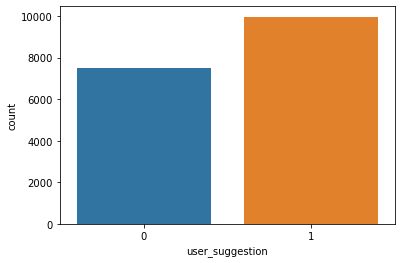

In [4]:
# Start ---------------------------------------------------------------
#ignore warnings
wrn.filterwarnings('ignore')
# Read training file
train_set = pd.read_csv("train.csv")

# x = train
# y = answer
x = train_set["user_review"]
y = train_set["user_suggestion"]
sns.countplot(train_set["user_suggestion"])
plt.show()

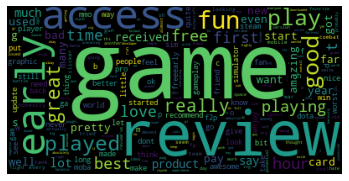

In [5]:
#plot word cloud
plotWordCloud(x)

In [6]:
# Clean texts
x_cleaned = cleanTexts(x)

## Tokenizer
* Once documents are collected, an important step in structuring their representation is tokenization. In this step, the text is segmented into terms (also called tokens).

In [7]:
# Set all words
tokenizer = Tokenizer(num_words=None)

tokenizer.fit_on_texts(x_cleaned)
x_tokens = tokenizer.texts_to_sequences(x_cleaned)

len_arr = [len(s) for s in x_tokens]

<AxesSubplot:title={'center':'Distribution of text size'}, ylabel='Density'>

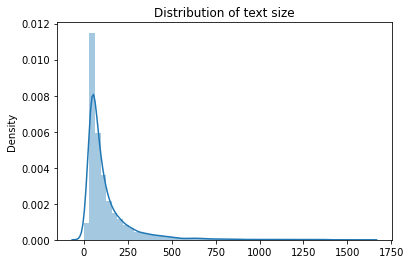

In [8]:
textSize = pd.Series(len_arr)
plt.title("Distribution of text size")
sns.distplot(x=textSize, kde=True)


In [9]:
# analyzing probability density function the lenght chosen for the experiment was 200
MAX_LEN = 200

# Select MAX_LEN last words of the text
x_tokens_pad = pad_sequences(x_tokens,maxlen=MAX_LEN)


# deterministic Split 20% for test in set training
x_train,x_test,y_train,y_test = train_test_split(x_tokens_pad,np.asarray(y),test_size=0.2,random_state=42)

# Size of tokenized words
VOCAB_SIZE = len(tokenizer.word_index) + 1

# Set embedding layer size
VECTOR_SIZE = 100

In [11]:
model = buildModelGRU(MAX_LEN, VOCAB_SIZE, VECTOR_SIZE)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          5192800   
_________________________________________________________________
gru_2 (GRU)                  (None, 200, 256)          274176    
_________________________________________________________________
gru_3 (GRU)                  (None, 512)               1181184   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 6,648,673
Trainable params: 6,648,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
350/350 [==============================] - 459s 1s/step - loss: 0.5626 - accuracy: 0.7131 - val_loss: 0.4712 - val_accuracy: 0.7635
Epoch 2/3
350/350 [==============================] - 457s 1s/step - loss: 0.2957 - accuracy: 0.8796 

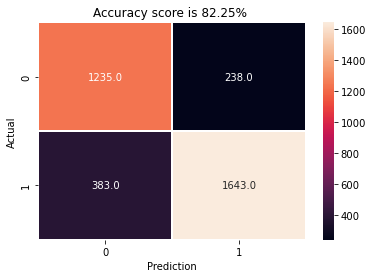

In [13]:
model.summary()

model.fit(x_train,y_train,epochs=3,validation_split=0.2)

y_pred = model.predict_classes(x_test)

accuracy_sc = round(accuracy_score(y_pred=y_pred,y_true=y_test)*100,2)
conf_matrix = confusion_matrix(y_pred=y_pred,y_true=y_test)


print("Accuracy score is {}%".format(accuracy_sc))

plt.subplots()
sns.heatmap(conf_matrix,annot=True,linewidths=1.5,fmt=".1f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Accuracy score is {}% ".format(accuracy_sc))
#plt.savefig('heatMap-LSTM-60-100-512-1024-1024-semTreino-3epocas.png', dpi=600, format='png')
plt.show()

---
## References
[1] Inteligência Artificial - Uma Abordagem de Aprendizado de Máquina ISBN: 9788521637349 Edição: 2|2021 Editora: LTC Katti Faceli, Ana Carolina Lorena, João Gama, Tiago Agostinho de Almeida e André C. P. L. F de Carva

[2] [`Scikit learn`](https://scikit-learn.org/stable/)

[3] [`Wikipedia`](https://en.wikipedia.org/wiki/Long_short-term_memory) 

[4]  [`matplotlib`](https://matplotlib.org/) 

[5]  [`seaborn`](https://seaborn.pydata.org/) 

[6]  [`numpy`](https://numpy.org) 

[7]  [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html)

[8]  [`TensorFlow`](https://www.tensorflow.org)